## **Importing Libraries and dataset**

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
dataset = pd.read_csv('heart_attack_prediction_india.csv')

In [47]:
dataset.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0.0,4,0.0,0,157,611025.0,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0.0,7,0.0,0,331,174527.0,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1.0,10,1.0,0,186,1760112.0,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0.0,1,1.0,1,324,1398213.0,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0.0,9,0.0,0,209,97987.0,0,1


# ***Data Cleaning***

In [48]:
dataset_one = pd.get_dummies(dataset["Gender"]).astype(int)

In [49]:
X = pd.concat((dataset_one, dataset), axis= 1)

In [50]:
X.head()

,Female,Male,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,0,1,Rajasthan,42,Female,0,0,1,1,...,119,1,0.0,4,0.0,0,157,611025.0,0,0
1,0,1,2,Himachal Pradesh,26,Male,0,0,0,0,...,115,0,0.0,7,0.0,0,331,174527.0,0,0
2,0,1,3,Assam,78,Male,0,0,1,0,...,117,0,1.0,10,1.0,0,186,1760112.0,1,0
3,0,1,4,Odisha,58,Male,1,0,1,0,...,65,0,0.0,1,1.0,1,324,1398213.0,0,0
4,0,1,5,Karnataka,22,Male,0,0,0,0,...,109,0,0.0,9,0.0,0,209,97987.0,0,1


In [51]:
X.isnull().sum()

,0
Female,0
Male,0
Patient_ID,0
State_Name,0
Age,0
Gender,0
Diabetes,0
Hypertension,0
Obesity,0
Smoking,0


In [52]:
X = X.drop('Gender', axis=1)
X = X.drop('Patient_ID', axis=1)
X = X.drop('Annual_Income', axis=1)
X = X.drop('State_Name', axis=1)

# ***Handling null values***

In [53]:
X = X[X['Healthcare_Access'].notna()]

In [54]:
X = X[X['Family_History'].notna()]

In [55]:
X.isnull().sum()

,0
Female,0
Male,0
Age,0
Diabetes,0
Hypertension,0
Obesity,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity,0
Diet_Score,0


In [56]:
col = ['Cholesterol_Level','Triglyceride_Level','LDL_Level','HDL_Level','Systolic_BP','Diastolic_BP','Emergency_Response_Time']

In [57]:
from scipy.stats import zscore
for i in col:
    X["zscore"] = zscore(X[i])  # Ignores NaN values
    threshold = 3
    df_cleaned = X[(X["zscore"] > -threshold) & (X["zscore"] < threshold)]
    df_cleaned = df_cleaned.drop(columns=["zscore"])
    df_cleaned.head()

# **Exploratory Data Analysis**

# ***Univariate***

*Histogram plot*

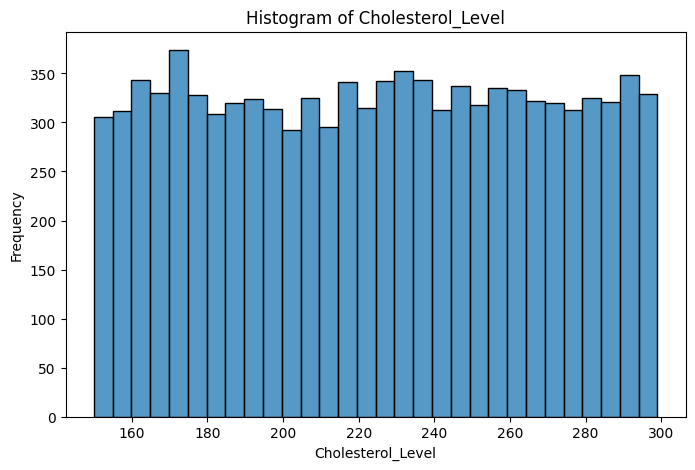

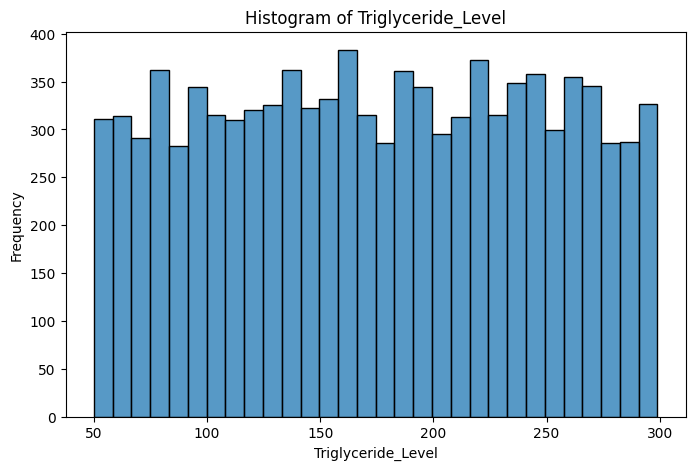

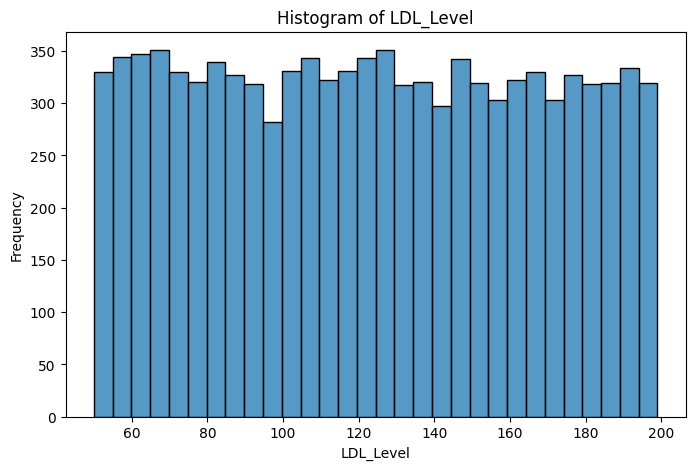

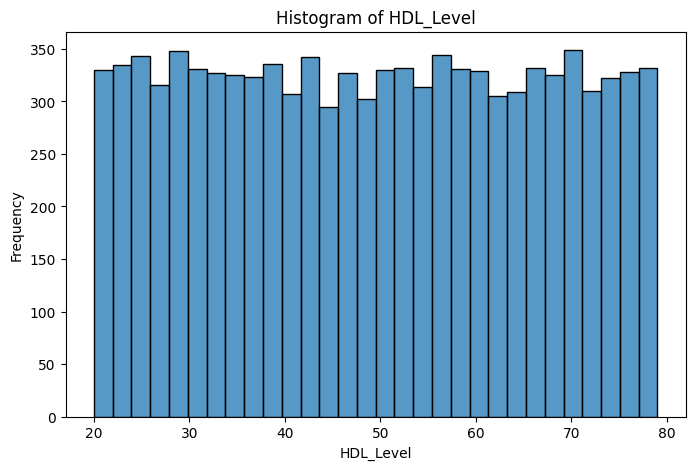

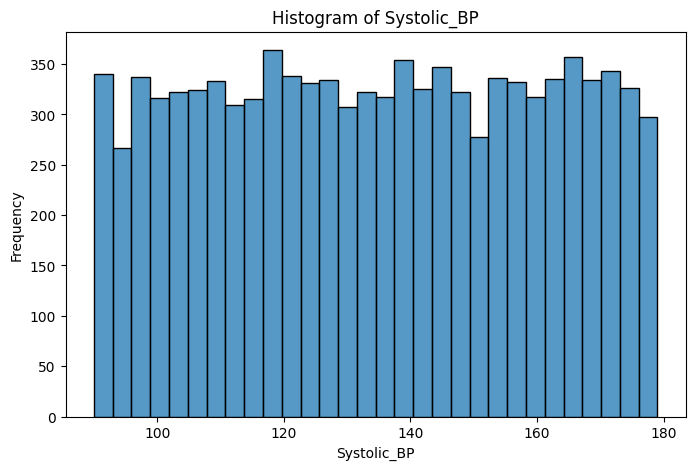

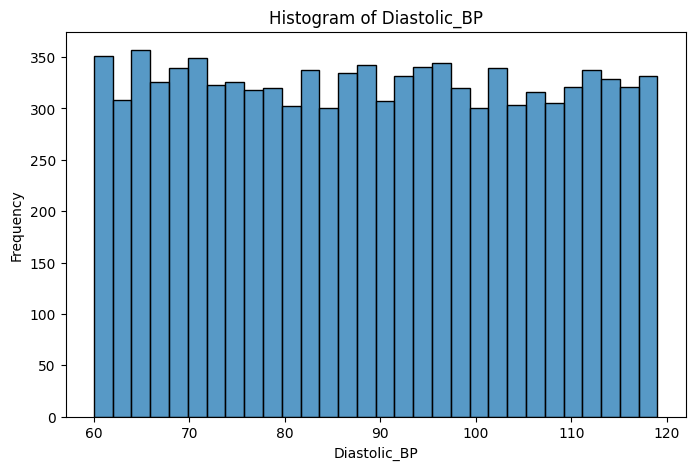

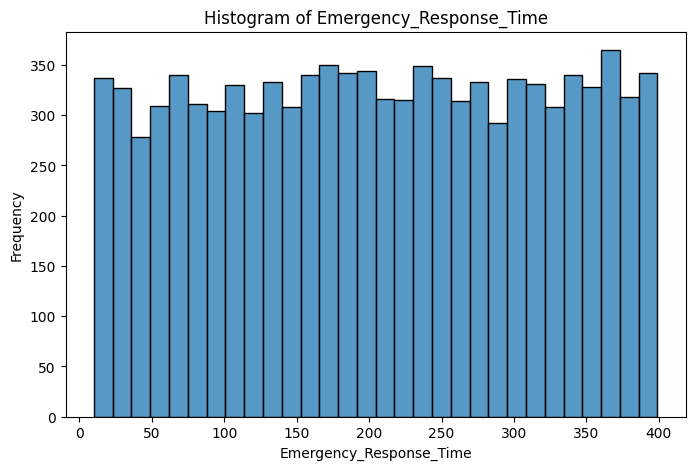

In [58]:
for i in col:
  plt.figure(figsize=(8, 5))
  sns.histplot(X[i], bins=30)
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {i}")
  plt.show()

*KDE Plot*

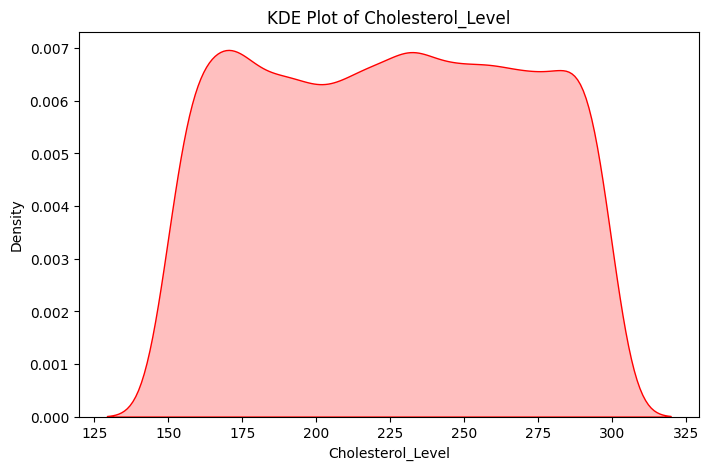

Skewness of Cholesterol_Level: -0.005815332475586076


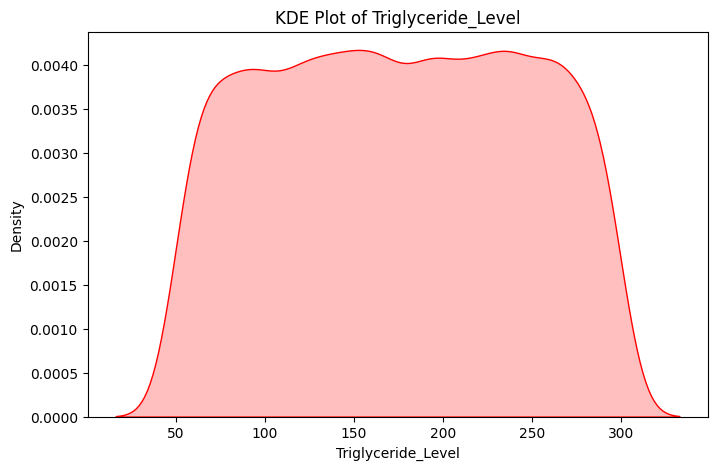

Skewness of Triglyceride_Level: -0.009689484331995393


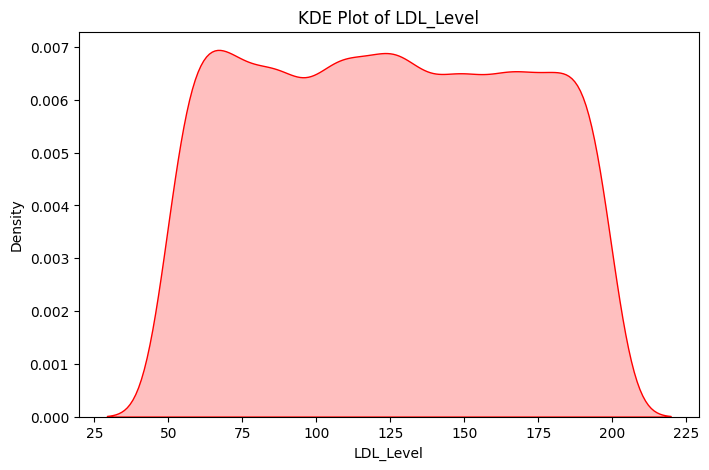

Skewness of LDL_Level: 0.01731798226664633


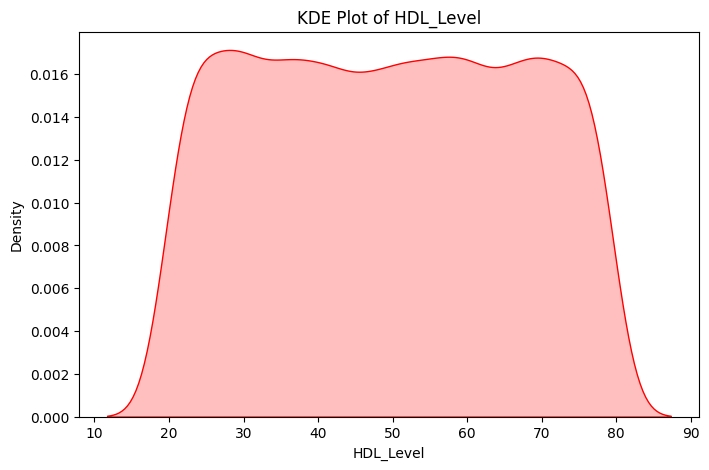

Skewness of HDL_Level: 0.0063121473918849496


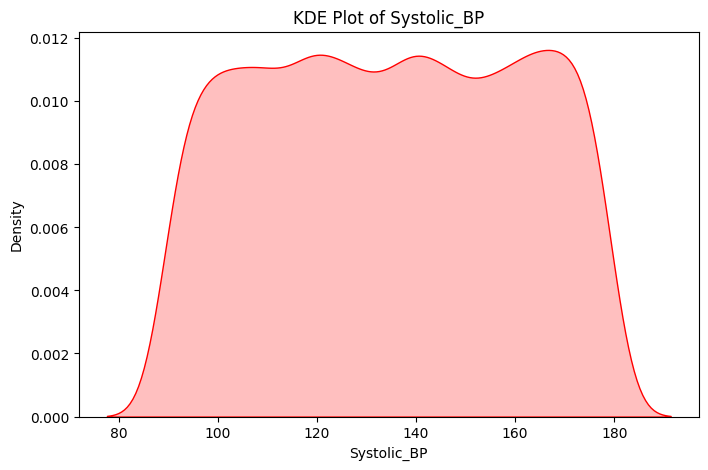

Skewness of Systolic_BP: -0.008238873520923156


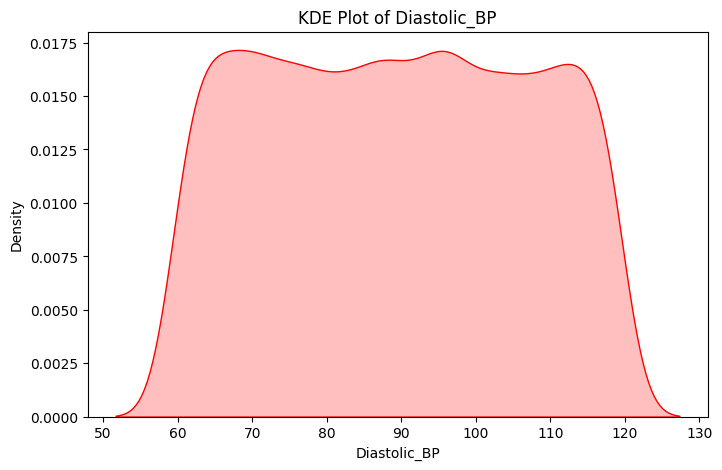

Skewness of Diastolic_BP: 0.012454441194562424


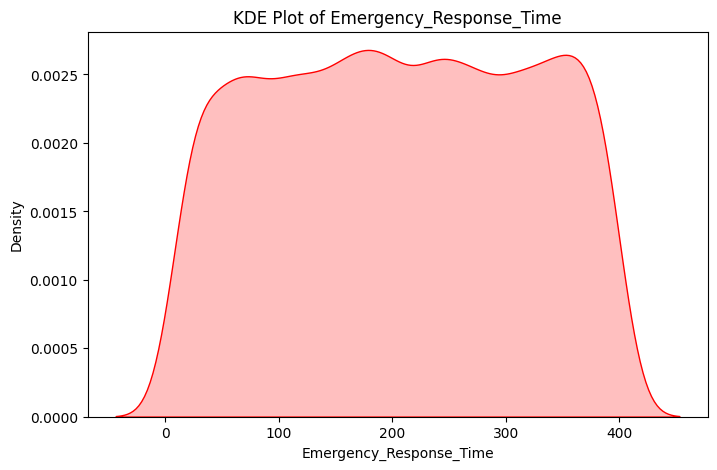

Skewness of Emergency_Response_Time: -0.017889409214973548


In [59]:
from scipy.stats import skew
for i in col:
  plt.figure(figsize=(8, 5))
  sns.kdeplot(X[i], fill=True, color="red")
  plt.xlabel(i)
  plt.ylabel("Density")
  plt.title(f"KDE Plot of {i}")
  plt.show()
  skewness_value = skew(X[i])  # Ignores NaN values
  print(f"Skewness of {i}: {skewness_value}")

*Box Plot*

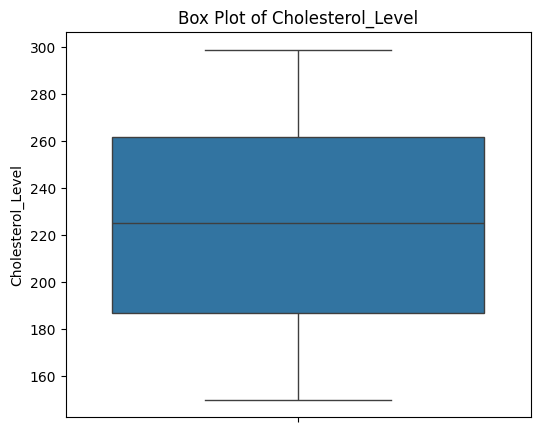

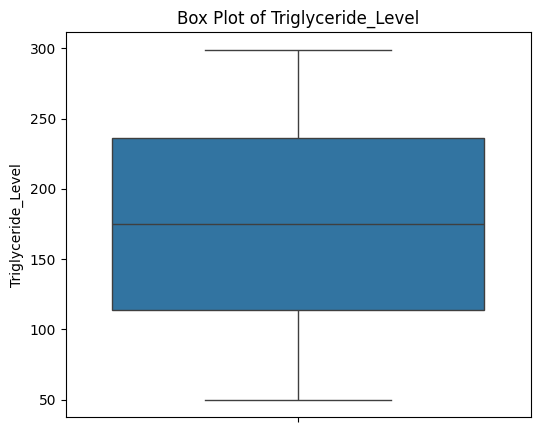

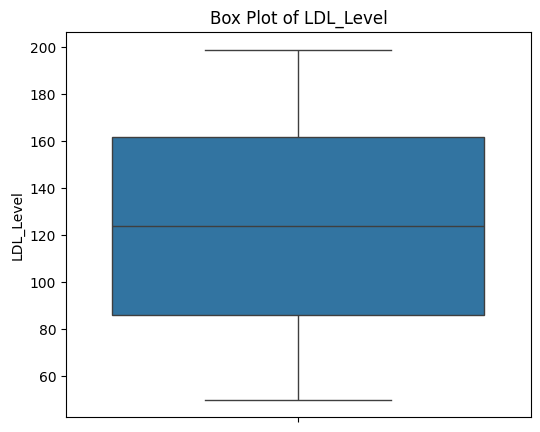

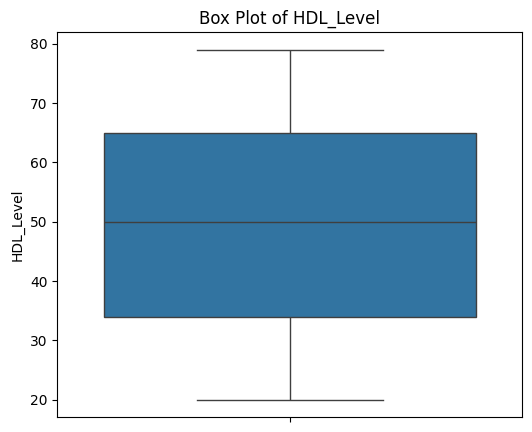

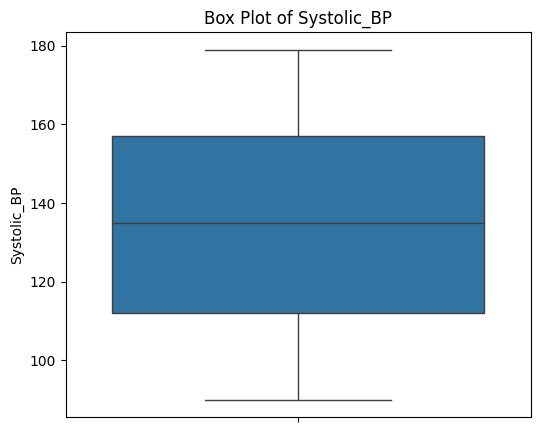

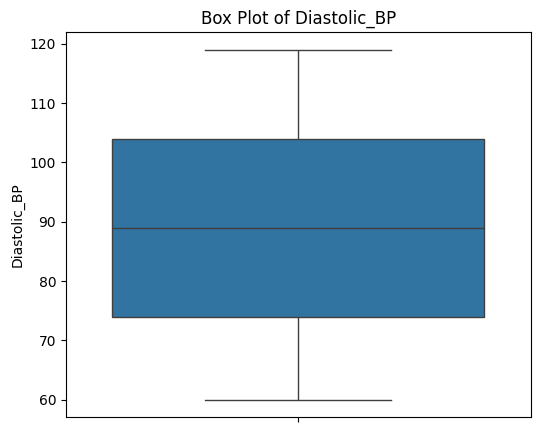

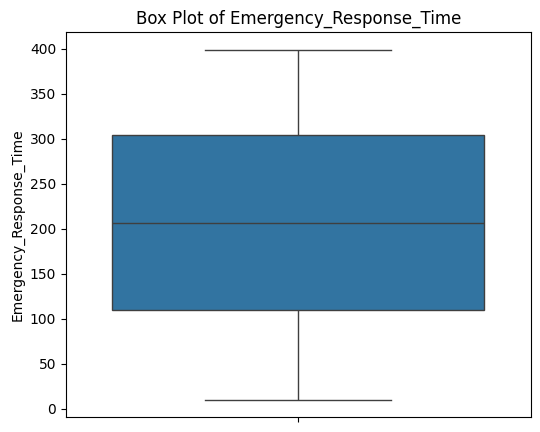

In [60]:
for i in col:
  plt.figure(figsize=(6, 5))
  sns.boxplot(y=X[i])
  plt.ylabel(i)
  plt.title(f"Box Plot of {i}")
  plt.show()

# ***Bivariate***

**Between Heart Attack History and Heart Attack Risk**

*Correlation matrix*

In [61]:
col1 = "Heart_Attack_History"
col2 = "Heart_Attack_Risk"

# Compute correlation
correlation = X[[col1, col2]].corr(method="pearson")
print(f"Correlation between {col1} and {col2}: \n", correlation)

Correlation between Heart_Attack_History and Heart_Attack_Risk: 
                       Heart_Attack_History  Heart_Attack_Risk
Heart_Attack_History               1.00000           -0.00278
Heart_Attack_Risk                 -0.00278            1.00000


*Heatmap*

<Axes: xlabel='Heart_Attack_Risk', ylabel='Heart_Attack_History'>

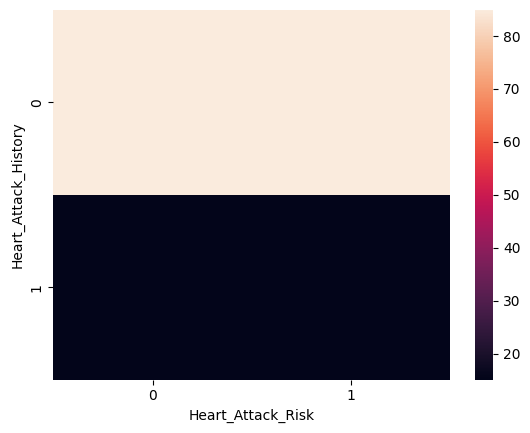

In [62]:
sns.heatmap(pd.crosstab(X[col1],X[col2],normalize='columns')*100)

*KDE*

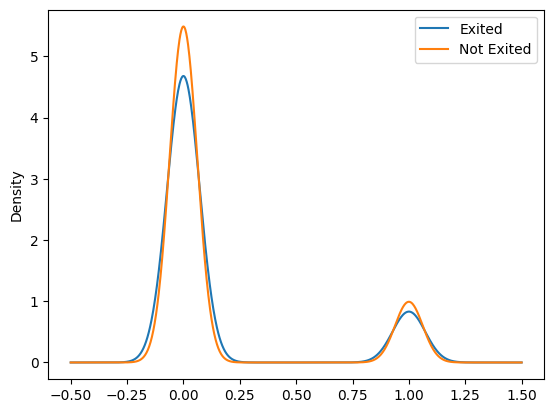

In [63]:
X[X[col2] == 1][col1].plot(kind='kde',label='Exited')
X[X[col2] == 0][col1].plot(kind='kde',label='Not Exited')

plt.legend()
plt.show()

**Between Heart Attack History and Heart Attack Risk**

Correlation *Matrix*

In [64]:
c1 = "Family_History"
c2 = "Heart_Attack_Risk"
# Compute correlation
correlation = X[[c1, c2]].corr(method="pearson")
print(f"Correlation between {c1} and {c2}: \n", correlation)

Correlation between Family_History and Heart_Attack_Risk: 
                    Family_History  Heart_Attack_Risk
Family_History           1.000000           0.003091
Heart_Attack_Risk        0.003091           1.000000


*Heatmap*

<Axes: xlabel='Heart_Attack_Risk', ylabel='Family_History'>

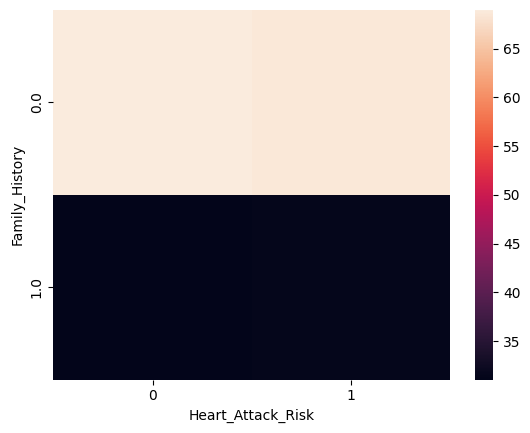

In [65]:
sns.heatmap(pd.crosstab(X[c1],X[c2],normalize='columns')*100)

*KDE*

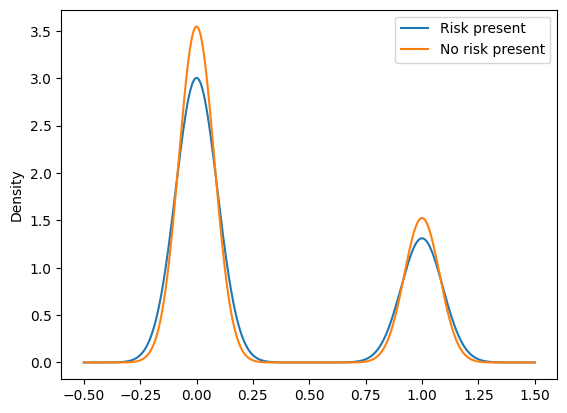

In [66]:
X[X[c1] == 1][c2].plot(kind='kde',label='Risk present')
X[X[c1] == 0][c2].plot(kind='kde',label='No risk present')

plt.legend()
plt.show()

# ***Multivariate***

*Heatmap*

In [69]:
column = ["Heart_Attack_Risk","Heart_Attack_History","Family_History"]

Text(0.5, 1.0, 'Heatmap of Heart_Attack_Risk based on Heart_Attack_History and hue Family_History')

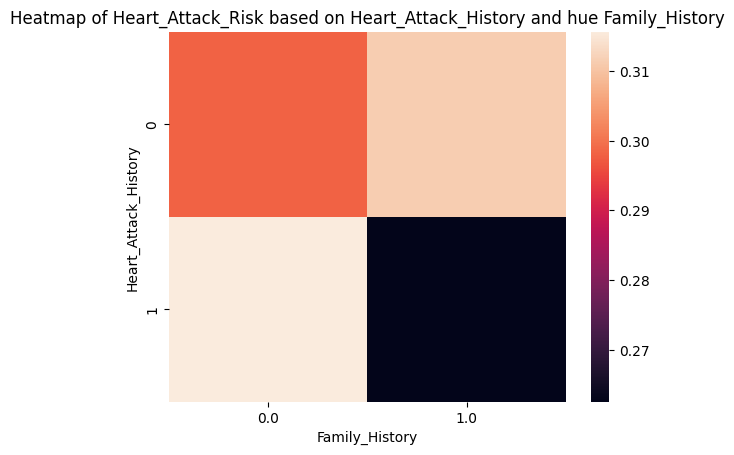

In [67]:
heatmap_data = X.pivot_table(values=column[0], index=column[1], columns=column[2], aggfunc="mean")
sns.heatmap(heatmap_data)
plt.title(f"Heatmap of {column[0]} based on {column[1]} and hue {column[2]}")

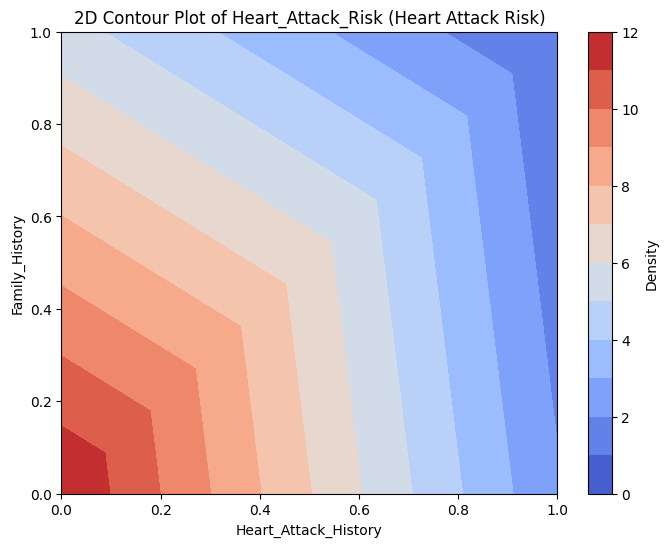

In [75]:
x = X[column[1]]  # Heart_Attack_History (X-axis)
y = X[column[2]]  # Family_History (Y-axis)
z = X[column[0]]  # Heart_Attack_Risk (Z-values for density)

# Compute 2D KDE
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)

# Create contour plot
plt.figure(figsize=(8, 6))
contour = plt.tricontourf(x, y, density, levels=12, cmap="coolwarm")  # Filled contour
plt.colorbar(contour, label="Density")

# Labels
plt.xlabel(column[1])  # Heart_Attack_History
plt.ylabel(column[2])  # Family_History
plt.title(f"2D Contour Plot of {column[0]} (Heart Attack Risk)")

plt.show()